In [74]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lifetimes

In [75]:
data1 = pd.read_csv('/Users/chocz/Documents/customer_value/olist_orders_dataset.csv')
data2 = pd.read_csv('/Users/chocz/Documents/customer_value/olist_customers_dataset.csv')
data3 = pd.read_csv('/Users/chocz/Documents/customer_value/olist_order_payments_dataset.csv')

In [76]:
data1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [77]:
data2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [78]:
data3.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [79]:
len(data1)

99441

In [80]:
len(data2)

99441

In [81]:
len(data3)

103886

In [82]:
data1.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [83]:
data2.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [84]:
data3.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [85]:
orders = data1[['order_id','customer_id','order_purchase_timestamp']]
orders = orders.drop_duplicates(inplace=False)
orders.head()

,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39


In [86]:
orders = orders.set_index('customer_id')

In [87]:
customers = data2[['customer_id','customer_unique_id','customer_city']]
customers = customers.drop_duplicates(inplace=False)

In [88]:
customers = customers.set_index('customer_id')

In [89]:
payments = data3[['order_id','payment_installments','payment_value']]
payments = payments.drop_duplicates(inplace=False)

In [90]:
payments = payments.set_index('order_id')

In [91]:
elog = pd.concat([orders,customers], axis=1, join='inner')

In [92]:
cols = ['customer_unique_id', 'order_purchase_timestamp']
elog = elog[cols]

In [93]:
elog['order_purchase_timestamp'] = pd.to_datetime(elog['order_purchase_timestamp'])
elog['order_date'] = elog.order_purchase_timestamp.dt.date
elog['order_date'] = pd.to_datetime(elog['order_date'])

In [94]:
cols = ['customer_unique_id', 'order_date']
elog = elog[cols]

In [96]:
elog.columns = ['CUSTOMER_ID', 'ORDER_DATE']
elog.columns

Index(['CUSTOMER_ID', 'ORDER_DATE'], dtype='object')

In [98]:
elog.info()
elog.head()

<class 'pandas.core.frame.DataFrame'>
Index: 99441 entries, 9ef432eb6251297304e76186b10a928d to edb027a75a1449115f6b43211ae02a24
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CUSTOMER_ID  99441 non-null  object        
 1   ORDER_DATE   99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 2.3+ MB


,CUSTOMER_ID,ORDER_DATE
customer_id,,
9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,2017-10-02
b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,2018-07-24
41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08
f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,2017-11-18
8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13


In [99]:
%%time
calibration_period_ends = '2018-06-30'

from lifetimes.utils import calibration_and_holdout_data

summary_cal_holdout = calibration_and_holdout_data(elog, 
                                                   customer_id_col = 'CUSTOMER_ID', 
                                                   datetime_col = 'ORDER_DATE', 
                                                   freq = 'D', #days
                                        calibration_period_end=calibration_period_ends,
                                        observation_period_end='2018-09-28' )

CPU times: user 7.42 s, sys: 1.37 s, total: 8.79 s
Wall time: 6.12 s


In [100]:
%%time 

from lifetimes import ModifiedBetaGeoFitter

mbgnbd = ModifiedBetaGeoFitter(penalizer_coef=0.01)
mbgnbd.fit(summary_cal_holdout['frequency_cal'], 
        summary_cal_holdout['recency_cal'], 
        summary_cal_holdout['T_cal'],
       verbose=True)

Optimization terminated successfully.
         Current function value: 0.085065
         Iterations: 42
         Function evaluations: 43
         Gradient evaluations: 43
CPU times: user 1.08 s, sys: 47 ms, total: 1.12 s
Wall time: 1.12 s


<lifetimes.ModifiedBetaGeoFitter: fitted with 83748 subjects, a: 0.22, alpha: 218.09, b: 0.12, r: 0.10>

In [101]:
print(mbgnbd)

<lifetimes.ModifiedBetaGeoFitter: fitted with 83748 subjects, a: 0.22, alpha: 218.09, b: 0.12, r: 0.10>


In [102]:
t = 90 
summary_cal_holdout['predicted_purchases'] = mbgnbd.conditional_expected_number_of_purchases_up_to_time(t, 
                                                                                      summary_cal_holdout['frequency_cal'], 
                                                                                      summary_cal_holdout['recency_cal'], 
                                                                                      summary_cal_holdout['T_cal'])

summary_cal_holdout['p_alive'] = mbgnbd.conditional_probability_alive(summary_cal_holdout['frequency_cal'], 
                                                                         summary_cal_holdout['recency_cal'], 
                                                                         summary_cal_holdout['T_cal'])
summary_cal_holdout['p_alive'] = np.round(summary_cal_holdout['p_alive'] / summary_cal_holdout['p_alive'].max(), 2)

In [103]:
display(summary_cal_holdout.sample(2).T)

CUSTOMER_ID,2bb237e8fa07f2ac4af1491b20318e50,b26bbb11c1875531633828f729d972ef
frequency_cal,0.00000,0.000000
recency_cal,0.00000,0.000000
T_cal,2.00000,6.000000
frequency_holdout,0.00000,0.000000
duration_holdout,90.00000,90.000000
predicted_purchases,0.01343,0.013182
p_alive,0.36000,0.360000


CPU times: user 12.8 s, sys: 67.4 ms, total: 12.9 s
Wall time: 12.9 s


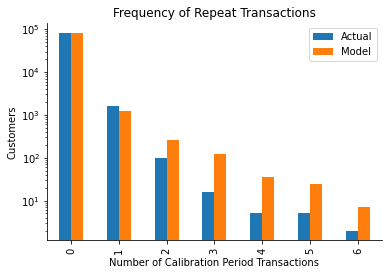

In [104]:
%%time 

from lifetimes.plotting import plot_period_transactions
ax = plot_period_transactions(mbgnbd, max_frequency=7)
ax.set_yscale('log')
sns.despine();

CPU times: user 62 ms, sys: 14.7 ms, total: 76.7 ms
Wall time: 70.9 ms


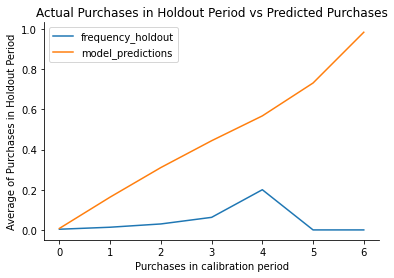

In [105]:
%%time 

from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

plot_calibration_purchases_vs_holdout_purchases(mbgnbd, summary_cal_holdout)
sns.despine();

Probability that customer is alive today is [0.31]


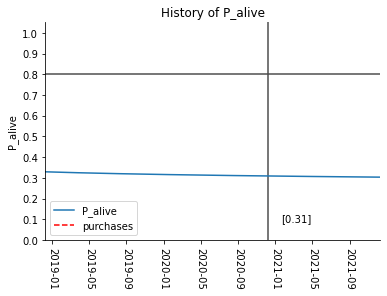

In [106]:
from lifetimes.plotting import plot_history_alive
from datetime import date
from pylab import figure, text, scatter, show

individual = summary_cal_holdout.iloc[4942]

id = individual.name
t = 365*50

today = date.today()
two_year_ago = today.replace(year=today.year - 2)
one_year_from_now = today.replace(year=today.year + 1)

sp_trans = elog.loc[elog['CUSTOMER_ID'] == id]

from lifetimes.utils import calculate_alive_path

t = (today - sp_trans.ORDER_DATE.min().date()).days
p_alive_today = pd.DataFrame(calculate_alive_path(mbgnbd, sp_trans, 'ORDER_DATE', t, freq='D'))[0].tail(1).values
p_alive_today = np.round(p_alive_today[0], 2)
print('Probability that customer is alive today is', p_alive_today)

t = (one_year_from_now - sp_trans.ORDER_DATE.min().date()).days
ax = plot_history_alive(mbgnbd, t, sp_trans, 'ORDER_DATE', start_date=two_year_ago) #, start_date='2016-01-01'
ax.vlines(x=today, ymin=0, ymax=1.05, colors='#4C4C4C')
ax.hlines(y=0.8, xmin=two_year_ago, xmax=one_year_from_now, colors='#4C4C4C')

ax.set_xlim(two_year_ago, one_year_from_now) # sp_trans.ORDER_DATE.min()
ax.set_ylim(0, 1.05)

plt.xticks(rotation=-90)
text(0.75, 0.1, p_alive_today, ha='center', va='center', transform=ax.transAxes)

sns.despine()

In [107]:
elog.columns = ['CUSTOMER_ID', 'date']

In [108]:
from lifetimes.utils import expected_cumulative_transactions

t = (elog.date.max() - elog.date.min()).days
df = expected_cumulative_transactions(mbgnbd, elog, 'date', 'CUSTOMER_ID', t)


In [110]:
df.tail(10)

,actual,predicted
763,2383,3810.515971
764,2383,3823.461093
765,2383,3836.400699
766,2383,3849.334804
767,2383,3862.263423
768,2383,3875.186570
769,2383,3888.104262
770,2383,3901.016511
771,2383,3913.923334
772,2384,3926.824743


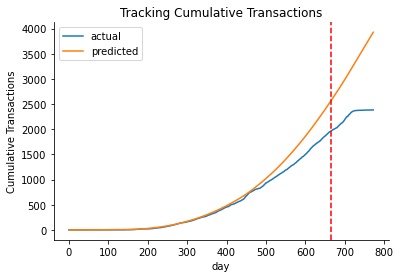

In [111]:
from datetime import datetime

cal = datetime.strptime('2018-06-30', '%Y-%m-%d')

from lifetimes.plotting import plot_cumulative_transactions
t = (elog.date.max() - elog.date.min()).days
t_cal = (cal - elog.date.min()).days
plot_cumulative_transactions(mbgnbd, elog, 'date', 'CUSTOMER_ID', t, t_cal, freq='D')
sns.despine()

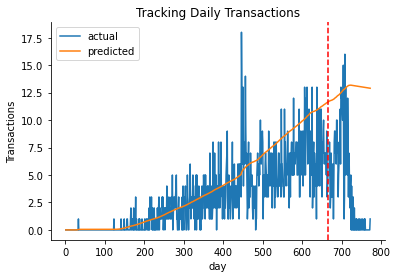

In [112]:
from lifetimes.plotting import plot_incremental_transactions
plot_incremental_transactions(mbgnbd, elog, 'date', 'CUSTOMER_ID', t, t_cal, freq='D')
sns.despine()